In [11]:
import csv
import pandas as pd
import re
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs


### Loading in Data

In [12]:
majors = pd.read_csv('all-ages.csv')
majors = majors.iloc[:,0:11]
majors

degrees = pd.read_csv('degrees-that-pay-back.csv')
degrees

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
5,Art History,35800.0,64900.0,81.3,28800.0,42200.0,87400.0,125000.0
6,Biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
7,Business Management,43000.0,72100.0,67.7,38800.0,51500.0,102000.0,147000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
9,Chemistry,42600.0,79900.0,87.6,45300.0,60700.0,108000.0,148000.0


### Normalizing Column Names

In [13]:
majors["Major"] = majors["Major"].str.lower()
degrees['Undergraduate Major'] = degrees['Undergraduate Major'].str.lower()

In [14]:
majors

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,general agriculture,Agriculture & Natural Resources,128148.0,90245.0,74078.0,2423.0,0.03,50000.0,34000.0,80000.0
1,1101,agriculture production and management,Agriculture & Natural Resources,95326.0,76865.0,64240.0,2266.0,0.03,54000.0,36000.0,80000.0
2,1102,agricultural economics,Agriculture & Natural Resources,33955.0,26321.0,22810.0,821.0,0.03,63000.0,40000.0,98000.0
3,1103,animal sciences,Agriculture & Natural Resources,103549.0,81177.0,64937.0,3619.0,0.04,46000.0,30000.0,72000.0
4,1104,food science,Agriculture & Natural Resources,24280.0,17281.0,12722.0,894.0,0.05,62000.0,38500.0,90000.0
5,1105,plant science and agronomy,Agriculture & Natural Resources,79409.0,63043.0,51077.0,2070.0,0.03,50000.0,35000.0,75000.0
6,1106,soil science,Agriculture & Natural Resources,6586.0,4926.0,4042.0,264.0,0.05,63000.0,39400.0,88000.0
7,1199,miscellaneous agriculture,Agriculture & Natural Resources,8549.0,6392.0,5074.0,261.0,0.04,52000.0,35000.0,75000.0
8,1301,environmental science,Biology & Life Science,106106.0,87602.0,65238.0,4736.0,0.05,52000.0,38000.0,75000.0
9,1302,forestry,Agriculture & Natural Resources,69447.0,48228.0,39613.0,2144.0,0.04,58000.0,40500.0,80000.0


In [15]:
majors.describe()

,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
count,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057168,56816.184971,38697.109827,82506.358382
std,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019576,14706.226865,9414.524761,20805.330126
min,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.050000,46000.000000,32000.000000,70000.000000
50%,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.050000,53000.000000,36000.000000,80000.000000
75%,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.070000,65000.000000,42000.000000,95000.000000
max,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.160000,125000.000000,78000.000000,210000.000000


In [16]:
degrees.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,aerospace engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


### Merging Data

In [17]:
merged = pd.merge(majors[['Major', 'Total', 'Employed', 'Employed_full_time_year_round','Unemployed', 'Unemployment_rate','Median','P25th','P75th']] , degrees, left_on= 'Major', right_on='Undergraduate Major', how = "inner")
mergedWhole = pd.merge(majors[['Major', 'Total', 'Employed', 'Employed_full_time_year_round','Unemployed', 'Unemployment_rate','Median','P25th','P75th']], degrees, left_on= 'Major', right_on='Undergraduate Major', how = "outer")

In [18]:
merged.head()

,Major,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,forestry,69447.0,48228.0,39613.0,2144.0,0.04,58000.0,40500.0,80000.0,forestry,39100.0,62600.0,60.1,41000.0,49300.0,78200.0,111000.0
1,architecture,294692.0,216770.0,163020.0,20394.0,0.09,63000.0,40400.0,93500.0,architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
2,communications,987676.0,790696.0,595739.0,54390.0,0.06,50000.0,35000.0,80000.0,communications,38100.0,70000.0,83.7,37500.0,49700.0,98800.0,143000.0
3,journalism,418104.0,314438.0,235407.0,20754.0,0.06,50000.0,35000.0,80000.0,journalism,35600.0,66700.0,87.4,38400.0,48300.0,97700.0,145000.0
4,computer science,783292.0,656372.0,561052.0,34196.0,0.05,78000.0,51000.0,105000.0,computer science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0


In [19]:
nonmerged = mergedWhole[pd.isnull(mergedWhole['Starting Median Salary'])]
nonmerged.head()

,Major,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,general agriculture,128148.0,90245.0,74078.0,2423.0,0.03,50000.0,34000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,agriculture production and management,95326.0,76865.0,64240.0,2266.0,0.03,54000.0,36000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agricultural economics,33955.0,26321.0,22810.0,821.0,0.03,63000.0,40000.0,98000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,animal sciences,103549.0,81177.0,64937.0,3619.0,0.04,46000.0,30000.0,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,food science,24280.0,17281.0,12722.0,894.0,0.05,62000.0,38500.0,90000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
nonmerged.insert(loc=1, column='major_match', value=['' for i in range(nonmerged.shape[0])])
nonmerged.head()

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,general agriculture,,128148.0,90245.0,74078.0,2423.0,0.03,50000.0,34000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,agriculture production and management,,95326.0,76865.0,64240.0,2266.0,0.03,54000.0,36000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agricultural economics,,33955.0,26321.0,22810.0,821.0,0.03,63000.0,40000.0,98000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,animal sciences,,103549.0,81177.0,64937.0,3619.0,0.04,46000.0,30000.0,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,food science,,24280.0,17281.0,12722.0,894.0,0.05,62000.0,38500.0,90000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
nonmerged = nonmerged.reset_index(drop = True)
nonmerged

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,general agriculture,,128148.0,90245.0,74078.0,2423.0,0.03,50000.0,34000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,agriculture production and management,,95326.0,76865.0,64240.0,2266.0,0.03,54000.0,36000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agricultural economics,,33955.0,26321.0,22810.0,821.0,0.03,63000.0,40000.0,98000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,animal sciences,,103549.0,81177.0,64937.0,3619.0,0.04,46000.0,30000.0,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,food science,,24280.0,17281.0,12722.0,894.0,0.05,62000.0,38500.0,90000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,plant science and agronomy,,79409.0,63043.0,51077.0,2070.0,0.03,50000.0,35000.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soil science,,6586.0,4926.0,4042.0,264.0,0.05,63000.0,39400.0,88000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,miscellaneous agriculture,,8549.0,6392.0,5074.0,261.0,0.04,52000.0,35000.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,environmental science,,106106.0,87602.0,65238.0,4736.0,0.05,52000.0,38000.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,natural resources management,,83188.0,65937.0,50595.0,3789.0,0.05,52000.0,37100.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Using Regex to Match Unmatched Data 

In [22]:
nonmerged.is_copy = False
pd.options.mode.chained_assignment = None
x = 0
try:
    while x < len(nonmerged): 
        regex1 = re.search("agricult", nonmerged.Major[x])
        regex2 = re.search("comput", nonmerged.Major[x])
        regex3 = re.search("educ", nonmerged.Major[x])
        regex4 = re.search("health", nonmerged.Major[x])
        regex5 = re.search("medic", nonmerged.Major[x])
        regex6 = re.search("business", nonmerged.Major[x])
        regex7 = re.search("hospitality", nonmerged.Major[x])
        regex8 = re.search("bio", nonmerged.Major[x])
        regex9 = re.search("architectur", nonmerged.Major[x])
        regex10 = re.search("mechanica", nonmerged.Major[x])
        #-----------------------------------------------------
        regex11 = re.search("miscellaneous engin", nonmerged.Major[x])
        regex12 = re.search("industrial", nonmerged.Major[x])
        regex13 = re.search("electrical en", nonmerged.Major[x])
        regex14 = re.search("counsel", nonmerged.Major[x])
        regex15 = re.search("statist", nonmerged.Major[x])
        regex16 = re.search("religious", nonmerged.Major[x])
        regex17 = re.search("theolog", nonmerged.Major[x])
        regex18 = re.search("psychology", nonmerged.Major[x])
        regex19 = re.search("fine art", nonmerged.Major[x])
        regex20 = re.search("drama", nonmerged.Major[x])
        #-----------------------------------------------------
        regex21 = re.search("graphic design", nonmerged.Major[x])
        regex22 = re.search("film", nonmerged.Major[x])
        regex23 = re.search("art history", nonmerged.Major[x])
        regex24 = re.search("studio art", nonmerged.Major[x])
        regex25 = re.search("visual and performing", nonmerged.Major[x])
        regex26 = re.search("animal sciences", nonmerged.Major[x])
        regex27 = re.search("area ethnic", nonmerged.Major[x])
        regex28 = re.search("communication", nonmerged.Major[x])
        regex29 = re.search("information sciences", nonmerged.Major[x])
        regex30 = re.search("mechanics", nonmerged.Major[x])
        #-----------------------------------------------------
        regex31 = re.search("geolog", nonmerged.Major[x])
        regex32 = re.search("foreign lang", nonmerged.Major[x])
        regex33 = re.search("court report", nonmerged.Major[x])
        regex34 = re.search("legal studies", nonmerged.Major[x])
        regex35 = re.search("english", nonmerged.Major[x])
        regex36 = re.search("composition", nonmerged.Major[x])
        regex37 = re.search("family and consumer", nonmerged.Major[x])
        regex38 = re.search("management information systems", nonmerged.Major[x])
        regex39 = re.search("math", nonmerged.Major[x])
        regex40 = re.search("nutrition", nonmerged.Major[x])
        #-----------------------------------------------------
        regex41 = re.search("physical sciences", nonmerged.Major[x])
        regex42 = re.search("astronomy", nonmerged.Major[x])
        regex43 = re.search("crimin", nonmerged.Major[x])
        regex44 = re.search("public", nonmerged.Major[x])
        regex45 = re.search("human services", nonmerged.Major[x])
        regex46 = re.search("social work", nonmerged.Major[x])
        regex47 = re.search("political science", nonmerged.Major[x])
        regex48 = re.search("anthropology", nonmerged.Major[x])
        regex49 = re.search("construction", nonmerged.Major[x])
        regex50 = re.search("pharmaceutical sciences and admin", nonmerged.Major[x])
        #-----------------------------------------------------
        regex51 = re.search("operations logistics", nonmerged.Major[x])
        regex52 = re.search("marketing", nonmerged.Major[x])
        regex53 = re.search("human resources", nonmerged.Major[x])
        regex54 = re.search("history", nonmerged.Major[x])
        regex55 = re.search("humanities", nonmerged.Major[x])
        regex56 = re.search("food science", nonmerged.Major[x])
        regex57 = re.search("general engineering", nonmerged.Major[x])
        regex58 = re.search("actuarial science", nonmerged.Major[x])
        if regex1:
            nonmerged.major_match[x] = "agriculture"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex2:
            nonmerged.major_match[x] = "computer science"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex3:
            nonmerged.major_match[x] = "education"
            print(nonmerged.Major[x])
            x = x + 1   
        elif regex4:
            nonmerged.major_match[x] = "health care administration"
            print(nonmerged.Major[x])
            x = x + 1   
        elif regex5:
            nonmerged.major_match[x] = "health care administration"
            print(nonmerged.Major[x])
            x = x + 1 
        elif regex6:
            nonmerged.major_match[x] = "business management"
            print(nonmerged.Major[x])
            x = x + 1 
        elif regex7:
            nonmerged.major_match[x] = "hospitality & tourism"
            print(nonmerged.Major[x])
            x = x + 1 
        elif regex8:
            nonmerged.major_match[x] = "biology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex9:
            nonmerged.major_match[x] = "architecture"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex10:
            nonmerged.major_match[x] = "mechanical engineering"
            print(nonmerged.Major[x])
            x = x + 1
        #-----------------------------------------------------
        elif regex11:
            nonmerged.major_match[x] = "civil engineering"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex12:
            nonmerged.major_match[x] = "industrial engineering"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex13:
            nonmerged.major_match[x] = "electrical engineering"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex14:
            nonmerged.major_match[x] = "psychology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex15:
            nonmerged.major_match[x] = "math"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex16:
            nonmerged.major_match[x] = "religion"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex17:
            nonmerged.major_match[x] = "religion"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex18:
            nonmerged.major_match[x] = "psychology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex19:
            nonmerged.major_match[x] = "art history"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex20:
            nonmerged.major_match[x] = "drama"
            print(nonmerged.Major[x])
            x = x + 1
        #-----------------------------------------------------
        elif regex21:
            nonmerged.major_match[x] = "graphic design"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex22:
            nonmerged.major_match[x] = "film"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex23:
            nonmerged.major_match[x] = "art history"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex24:
            nonmerged.major_match[x] = "graphic design"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex25:
            nonmerged.major_match[x] = "drama"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex26:
            nonmerged.major_match[x] = "biology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex27:
            nonmerged.major_match[x] = "anthropology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex28:
            nonmerged.major_match[x] = "communications"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex29:
            nonmerged.major_match[x] = "information technology (it)"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex30:
            nonmerged.major_match[x] = "mechanical engineering"
            print(nonmerged.Major[x])
            x = x + 1
        #-----------------------------------------------------
        elif regex31:
            nonmerged.major_match[x] = "geology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex32:
            nonmerged.major_match[x] = "spanish"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex33:
            nonmerged.major_match[x] = "criminal justice"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex34:
            nonmerged.major_match[x] = "criminal justice"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex35:
            nonmerged.major_match[x] = "english"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex36:
            nonmerged.major_match[x] = "english"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex37:
            nonmerged.major_match[x] = "sociology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex38:
            nonmerged.major_match[x] = "management information systems (mis)"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex39:
            nonmerged.major_match[x] = "math"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex40:
            nonmerged.major_match[x] = "nutrition"
            print(nonmerged.Major[x])
            x = x + 1
        #-----------------------------------------------------
        elif regex41:
            nonmerged.major_match[x] = "physician assistant"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex42:
            nonmerged.major_match[x] = "physics"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex43:
            nonmerged.major_match[x] = "criminal justice"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex44:
            nonmerged.major_match[x] = "political science"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex45:
            nonmerged.major_match[x] = "political science"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex46:
            nonmerged.major_match[x] = "political science"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex47:
            nonmerged.major_match[x] = "political science"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex48:
            nonmerged.major_match[x] = "anthropology"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex49:
            nonmerged.major_match[x] = "construction"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex50:
            nonmerged.major_match[x] = "healthcare administration"
            print(nonmerged.Major[x])
            x = x + 1
        #-----------------------------------------------------
        elif regex51:
            nonmerged.major_match[x] = "business management"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex52:
            nonmerged.major_match[x] = "marketing"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex53:
            nonmerged.major_match[x] = "business management"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex54:
            nonmerged.major_match[x] = "history"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex55:
            nonmerged.major_match[x] = "philosophy"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex56:
            nonmerged.major_match[x] = "nutrition"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex57:
            nonmerged.major_match[x] = "mechanical engineering"
            print(nonmerged.Major[x])
            x = x + 1
        elif regex58:
            nonmerged.major_match[x] = "math"
            print(nonmerged.Major[x])
            x = x + 1
        else:
            x = x + 1
except:
    print("an error occured")
nonmerged

general agriculture
agriculture production and management
agricultural economics
animal sciences
food science
miscellaneous agriculture
area ethnic and civilization studies
advertising and public relations
communication technologies
computer and information systems
computer programming and data processing
information sciences
computer administration management and security
computer networking and telecommunications
general education
educational administration and supervision
school student counseling
elementary education
mathematics teacher education
physical and health education teaching
early childhood education
science and computer teacher education
secondary teacher education
special needs education
social science or history teacher education
teacher education: multiple levels
language and drama education
art and music education
miscellaneous education
general engineering
biological engineering
architectural engineering
biomedical engineering
engineering mechanics physics and scien

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,general agriculture,agriculture,128148.0,90245.0,74078.0,2423.0,0.03,50000.0,34000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,agriculture production and management,agriculture,95326.0,76865.0,64240.0,2266.0,0.03,54000.0,36000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,agricultural economics,agriculture,33955.0,26321.0,22810.0,821.0,0.03,63000.0,40000.0,98000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,animal sciences,biology,103549.0,81177.0,64937.0,3619.0,0.04,46000.0,30000.0,72000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,food science,nutrition,24280.0,17281.0,12722.0,894.0,0.05,62000.0,38500.0,90000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,plant science and agronomy,,79409.0,63043.0,51077.0,2070.0,0.03,50000.0,35000.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soil science,,6586.0,4926.0,4042.0,264.0,0.05,63000.0,39400.0,88000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,miscellaneous agriculture,agriculture,8549.0,6392.0,5074.0,261.0,0.04,52000.0,35000.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,environmental science,,106106.0,87602.0,65238.0,4736.0,0.05,52000.0,38000.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,natural resources management,,83188.0,65937.0,50595.0,3789.0,0.05,52000.0,37100.0,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
len(nonmerged)

149

In [24]:
nonmerged = nonmerged.iloc[:,0:10]
nonmerged

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,general agriculture,agriculture,128148.0,90245.0,74078.0,2423.0,0.03,50000.0,34000.0,80000.0
1,agriculture production and management,agriculture,95326.0,76865.0,64240.0,2266.0,0.03,54000.0,36000.0,80000.0
2,agricultural economics,agriculture,33955.0,26321.0,22810.0,821.0,0.03,63000.0,40000.0,98000.0
3,animal sciences,biology,103549.0,81177.0,64937.0,3619.0,0.04,46000.0,30000.0,72000.0
4,food science,nutrition,24280.0,17281.0,12722.0,894.0,0.05,62000.0,38500.0,90000.0
5,plant science and agronomy,,79409.0,63043.0,51077.0,2070.0,0.03,50000.0,35000.0,75000.0
6,soil science,,6586.0,4926.0,4042.0,264.0,0.05,63000.0,39400.0,88000.0
7,miscellaneous agriculture,agriculture,8549.0,6392.0,5074.0,261.0,0.04,52000.0,35000.0,75000.0
8,environmental science,,106106.0,87602.0,65238.0,4736.0,0.05,52000.0,38000.0,75000.0
9,natural resources management,,83188.0,65937.0,50595.0,3789.0,0.05,52000.0,37100.0,75000.0


### Remerging Updated Data

In [25]:
mergedNew = pd.merge(nonmerged[['Major','major_match', 'Total', 'Employed', 'Employed_full_time_year_round','Unemployed', 'Unemployment_rate','Median','P25th','P75th']] , degrees, left_on= 'major_match', right_on='Undergraduate Major', how = "inner")
mergedWhole = pd.merge(majors[['Major', 'Total', 'Employed', 'Employed_full_time_year_round','Unemployed', 'Unemployment_rate','Median','P25th','P75th']], degrees, left_on= 'Major', right_on='Undergraduate Major', how = "outer")

In [26]:
mergedNew

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,general agriculture,agriculture,128148.0,90245.0,74078.0,2423.0,0.03,50000.0,34000.0,80000.0,agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
1,agriculture production and management,agriculture,95326.0,76865.0,64240.0,2266.0,0.03,54000.0,36000.0,80000.0,agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
2,agricultural economics,agriculture,33955.0,26321.0,22810.0,821.0,0.03,63000.0,40000.0,98000.0,agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,miscellaneous agriculture,agriculture,8549.0,6392.0,5074.0,261.0,0.04,52000.0,35000.0,75000.0,agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
4,animal sciences,biology,103549.0,81177.0,64937.0,3619.0,0.04,46000.0,30000.0,72000.0,biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
5,biological engineering,biology,32748.0,24270.0,18621.0,1521.0,0.06,62000.0,40000.0,91000.0,biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
6,biochemical sciences,biology,75322.0,52594.0,37103.0,4056.0,0.07,53000.0,33000.0,82000.0,biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
7,molecular biology,biology,28197.0,20221.0,13366.0,1303.0,0.06,45000.0,30000.0,70000.0,biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
8,microbiology,biology,68885.0,45422.0,33990.0,2435.0,0.05,60000.0,40000.0,85000.0,biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
9,miscellaneous biology,biology,29389.0,22298.0,16508.0,1114.0,0.05,52000.0,33500.0,72800.0,biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0


In [27]:
merged.insert(loc=1, column='major_match', value=['' for i in range(merged.shape[0])])

merged.is_copy = False
x = 0 
while x < len(merged.index):
    val = merged.Major[x]
    merged.major_match[x] = val
    x = x + 1
    
merged

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,forestry,forestry,69447.0,48228.0,39613.0,2144.0,0.04,58000.0,40500.0,80000.0,forestry,39100.0,62600.0,60.1,41000.0,49300.0,78200.0,111000.0
1,architecture,architecture,294692.0,216770.0,163020.0,20394.0,0.09,63000.0,40400.0,93500.0,architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
2,communications,communications,987676.0,790696.0,595739.0,54390.0,0.06,50000.0,35000.0,80000.0,communications,38100.0,70000.0,83.7,37500.0,49700.0,98800.0,143000.0
3,journalism,journalism,418104.0,314438.0,235407.0,20754.0,0.06,50000.0,35000.0,80000.0,journalism,35600.0,66700.0,87.4,38400.0,48300.0,97700.0,145000.0
4,computer science,computer science,783292.0,656372.0,561052.0,34196.0,0.05,78000.0,51000.0,105000.0,computer science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
5,aerospace engineering,aerospace engineering,65734.0,44944.0,38491.0,1969.0,0.04,80000.0,58000.0,110000.0,aerospace engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
6,chemical engineering,chemical engineering,188046.0,131697.0,109406.0,6388.0,0.05,86000.0,60000.0,120000.0,chemical engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
7,civil engineering,civil engineering,358593.0,262831.0,220528.0,14823.0,0.05,78000.0,55000.0,105000.0,civil engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0
8,computer engineering,computer engineering,154160.0,128742.0,111025.0,7456.0,0.05,80000.0,60000.0,107000.0,computer engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
9,electrical engineering,electrical engineering,671647.0,489965.0,422317.0,26064.0,0.05,88000.0,60000.0,116000.0,electrical engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0


In [28]:
mergedAll = pd.concat([merged, mergedNew], ignore_index = True)

In [29]:
mergedAll

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,forestry,forestry,69447.0,48228.0,39613.0,2144.0,0.04,58000.0,40500.0,80000.0,forestry,39100.0,62600.0,60.1,41000.0,49300.0,78200.0,111000.0
1,architecture,architecture,294692.0,216770.0,163020.0,20394.0,0.09,63000.0,40400.0,93500.0,architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
2,communications,communications,987676.0,790696.0,595739.0,54390.0,0.06,50000.0,35000.0,80000.0,communications,38100.0,70000.0,83.7,37500.0,49700.0,98800.0,143000.0
3,journalism,journalism,418104.0,314438.0,235407.0,20754.0,0.06,50000.0,35000.0,80000.0,journalism,35600.0,66700.0,87.4,38400.0,48300.0,97700.0,145000.0
4,computer science,computer science,783292.0,656372.0,561052.0,34196.0,0.05,78000.0,51000.0,105000.0,computer science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
5,aerospace engineering,aerospace engineering,65734.0,44944.0,38491.0,1969.0,0.04,80000.0,58000.0,110000.0,aerospace engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
6,chemical engineering,chemical engineering,188046.0,131697.0,109406.0,6388.0,0.05,86000.0,60000.0,120000.0,chemical engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
7,civil engineering,civil engineering,358593.0,262831.0,220528.0,14823.0,0.05,78000.0,55000.0,105000.0,civil engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0
8,computer engineering,computer engineering,154160.0,128742.0,111025.0,7456.0,0.05,80000.0,60000.0,107000.0,computer engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
9,electrical engineering,electrical engineering,671647.0,489965.0,422317.0,26064.0,0.05,88000.0,60000.0,116000.0,electrical engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0


In [30]:
all_match = mergedAll.dropna()
pd.set_option('display.max_rows', 300)
all_match

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,forestry,forestry,69447.0,48228.0,39613.0,2144.0,0.04,58000.0,40500.0,80000.0,forestry,39100.0,62600.0,60.1,41000.0,49300.0,78200.0,111000.0
1,architecture,architecture,294692.0,216770.0,163020.0,20394.0,0.09,63000.0,40400.0,93500.0,architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
2,communications,communications,987676.0,790696.0,595739.0,54390.0,0.06,50000.0,35000.0,80000.0,communications,38100.0,70000.0,83.7,37500.0,49700.0,98800.0,143000.0
3,journalism,journalism,418104.0,314438.0,235407.0,20754.0,0.06,50000.0,35000.0,80000.0,journalism,35600.0,66700.0,87.4,38400.0,48300.0,97700.0,145000.0
4,computer science,computer science,783292.0,656372.0,561052.0,34196.0,0.05,78000.0,51000.0,105000.0,computer science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
5,aerospace engineering,aerospace engineering,65734.0,44944.0,38491.0,1969.0,0.04,80000.0,58000.0,110000.0,aerospace engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
6,chemical engineering,chemical engineering,188046.0,131697.0,109406.0,6388.0,0.05,86000.0,60000.0,120000.0,chemical engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
7,civil engineering,civil engineering,358593.0,262831.0,220528.0,14823.0,0.05,78000.0,55000.0,105000.0,civil engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0
8,computer engineering,computer engineering,154160.0,128742.0,111025.0,7456.0,0.05,80000.0,60000.0,107000.0,computer engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
9,electrical engineering,electrical engineering,671647.0,489965.0,422317.0,26064.0,0.05,88000.0,60000.0,116000.0,electrical engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0


In [31]:
all_match.dtypes

Major                                                 object
major_match                                           object
Total                                                float64
Employed                                             float64
Employed_full_time_year_round                        float64
Unemployed                                           float64
Unemployment_rate                                    float64
Median                                               float64
P25th                                                float64
P75th                                                float64
Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percenti

### Exploratory Analysis and Methodology

In [32]:
all_match.describe()

,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,1.350000e+02,1.350000e+02,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,2.712213e+05,1.953909e+05,1.489629e+05,11462.888889,0.058296,55864.444444,38182.592593,81211.851852,42824.444444,72140.000000,68.208889,41346.666667,53705.185185,98812.592593,137839.259259
std,4.651201e+05,3.389617e+05,2.679230e+05,19842.308399,0.019758,12885.688386,8157.119220,18119.981763,8469.351829,15816.764203,15.760594,11478.434029,13633.170252,19901.032860,27380.366907
min,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35300.000000,24900.000000,45800.000000,34000.000000,52000.000000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,3.402850e+04,2.529550e+04,2.036650e+04,1586.500000,0.050000,45500.000000,32000.000000,70000.000000,35900.000000,60400.000000,57.350000,32800.000000,42200.000000,80700.000000,109000.000000
50%,8.806700e+04,6.639300e+04,5.101200e+04,4257.000000,0.060000,53000.000000,35600.000000,80000.000000,39200.000000,68500.000000,67.600000,36900.000000,49300.000000,96300.000000,136000.000000
75%,2.346035e+05,1.641100e+05,1.199275e+05,10889.500000,0.070000,65000.000000,42000.000000,94250.000000,45400.000000,88600.000000,77.850000,46250.000000,63200.000000,115000.000000,156000.000000
max,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.160000,97000.000000,60000.000000,136000.000000,74300.000000,107000.000000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


### Box Plot of Starting Median Salary

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Starting Median Salary for all Majors')

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1323: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


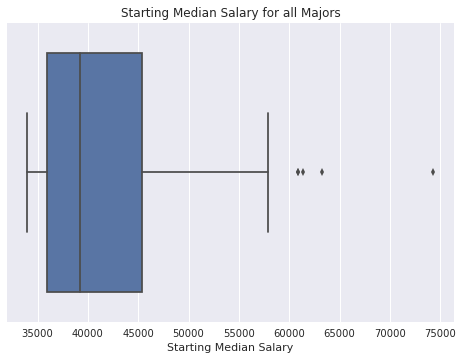

In [33]:
p = sns.boxplot(x=all_match["Starting Median Salary"])
p.set_xlabel("Starting Median Salary")
p.set_title("Starting Median Salary for all Majors")

### Box Plot of Mid-Career Salary

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Mid-Career Median Salary for all Majors')

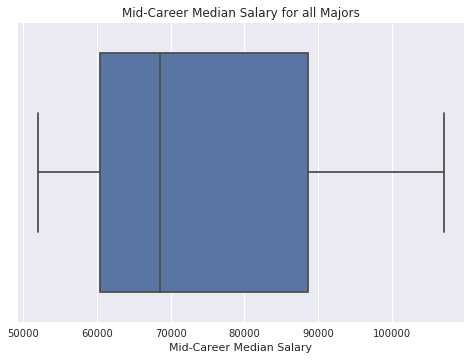

In [34]:
p = sns.boxplot(x=all_match["Mid-Career Median Salary"])
p.set_xlabel("Mid-Career Median Salary")
p.set_title("Mid-Career Median Salary for all Majors")

### Box Plot of Unemployment Rates

/usr/local/lib/python3.4/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Unemployment Rate for each Major')

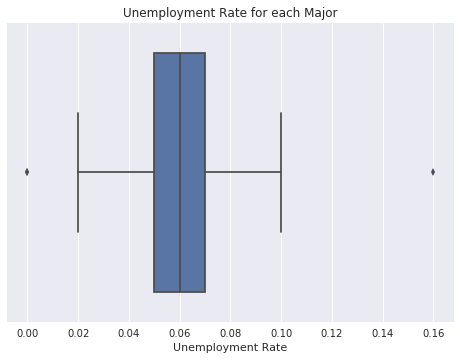

In [35]:
p = sns.boxplot(x=all_match["Unemployment_rate"])
p.set_xlabel("Unemployment Rate")
p.set_title("Unemployment Rate for each Major")

### Heat Map of Correlation Between Variables

/usr/local/lib/python3.4/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Total,1.000000,0.994806,0.984054,0.961130,-0.097135,0.002174,0.032618,0.023299,-0.017218,-0.037545,-0.041179,-0.053048,-0.056131,-0.004662,0.017533
Employed,0.994806,1.000000,0.995689,0.969372,-0.092083,0.025194,0.053901,0.050091,0.003963,-0.012733,-0.024223,-0.031023,-0.032542,0.020031,0.041918
Employed_full_time_year_round,0.984054,0.995689,1.000000,0.968817,-0.093127,0.062019,0.087684,0.089224,0.034682,0.023349,-0.004517,0.001870,0.002511,0.055300,0.074414
Unemployed,0.961130,0.969372,0.968817,1.000000,-0.004697,-0.005187,0.002289,0.043311,-0.041457,-0.015650,0.057513,-0.056187,-0.050665,0.032970,0.073394
Unemployment_rate,-0.097135,-0.092083,-0.093127,-0.004697,1.000000,-0.291608,-0.356223,-0.248209,-0.215647,-0.079350,0.272587,-0.160131,-0.143398,-0.010687,0.044641
Median,0.002174,0.025194,0.062019,-0.005187,-0.291608,1.000000,0.943821,0.950666,0.692376,0.737044,0.287301,0.745236,0.765220,0.659967,0.552663
P25th,0.032618,0.053901,0.087684,0.002289,-0.356223,0.943821,1.000000,0.868150,0.690139,0.697581,0.197299,0.732883,0.738430,0.611571,0.490967
P75th,0.023299,0.050091,0.089224,0.043311,-0.248209,0.950666,0.868150,1.000000,0.640949,0.728598,0.379250,0.690575,0.728700,0.678775,0.605323
Starting Median Salary,-0.017218,0.003963,0.034682,-0.041457,-0.215647,0.692376,0.690139,0.640949,1.000000,0.894372,0.078944,0.950691,0.944347,0.790825,0.611415
Mid-Career Median Salary,-0.037545,-0.012733,0.023349,-0.015650,-0.079350,0.737044,0.697581,0.728598,0.894372,1.000000,0.508285,0.918449,0.974136,0.963804,0.850843


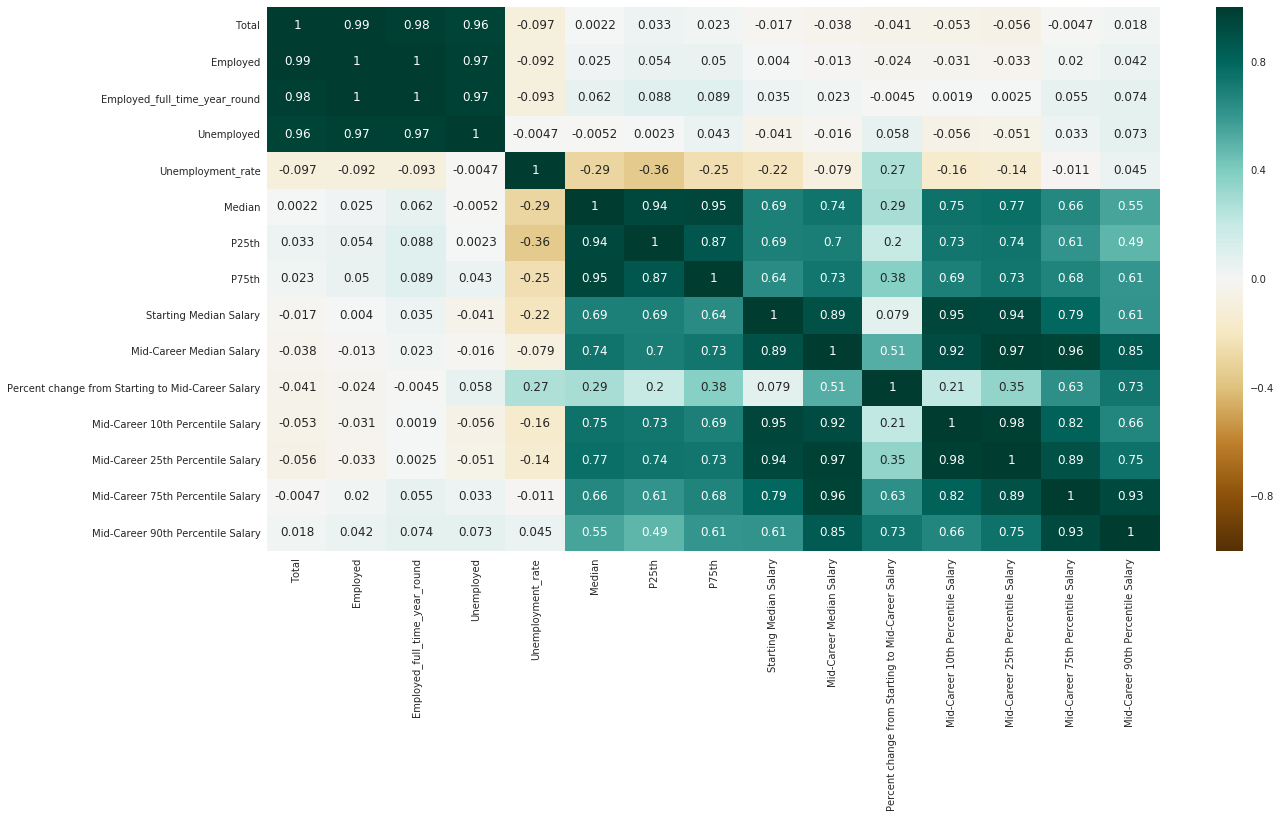

In [36]:
#plotting a heat map - this is a heat map of the correlation between variables
plt.figure(figsize=(20,10))
c= all_match.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Subsetting Data

In [37]:
top5Starting = all_match.nlargest(5,'Starting Median Salary')
top5Starting.head()

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
115,physical sciences,physician assistant,8856.0,5872.0,4961.0,238.0,0.04,60000.0,38000.0,89000.0,physician assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
6,chemical engineering,chemical engineering,188046.0,131697.0,109406.0,6388.0,0.05,86000.0,60000.0,120000.0,chemical engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
8,computer engineering,computer engineering,154160.0,128742.0,111025.0,7456.0,0.05,80000.0,60000.0,107000.0,computer engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
9,electrical engineering,electrical engineering,671647.0,489965.0,422317.0,26064.0,0.05,88000.0,60000.0,116000.0,electrical engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
97,electrical engineering technology,electrical engineering,94697.0,73737.0,64157.0,4572.0,0.06,67000.0,46900.0,91000.0,electrical engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0


In [38]:
top5Mid = all_match.nlargest(5,'Mid-Career Median Salary')
top5Mid.head()

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
6,chemical engineering,chemical engineering,188046.0,131697.0,109406.0,6388.0,0.05,86000.0,60000.0,120000.0,chemical engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
8,computer engineering,computer engineering,154160.0,128742.0,111025.0,7456.0,0.05,80000.0,60000.0,107000.0,computer engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
9,electrical engineering,electrical engineering,671647.0,489965.0,422317.0,26064.0,0.05,88000.0,60000.0,116000.0,electrical engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
97,electrical engineering technology,electrical engineering,94697.0,73737.0,64157.0,4572.0,0.06,67000.0,46900.0,91000.0,electrical engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
5,aerospace engineering,aerospace engineering,65734.0,44944.0,38491.0,1969.0,0.04,80000.0,58000.0,110000.0,aerospace engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0


### Grouped Bar Plot

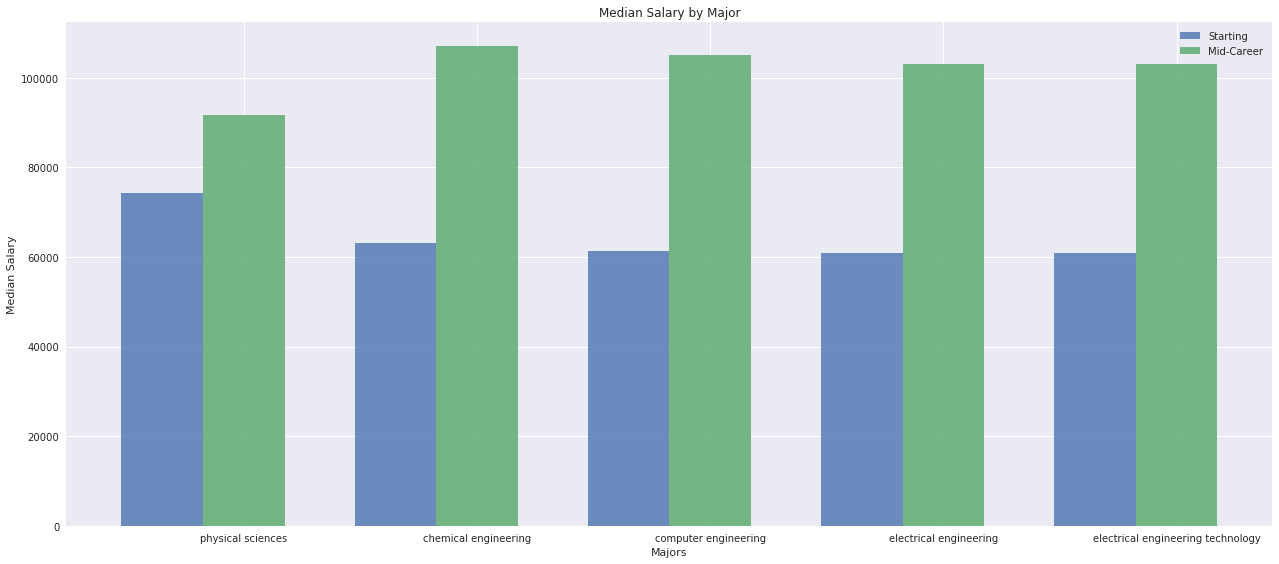

In [39]:
# data to plot
n_groups = 5
startingMed = top5Starting["Starting Median Salary"]
midMed = top5Starting["Mid-Career Median Salary"]

# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, startingMed, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Starting')

rects2 = plt.bar(index + bar_width, midMed, bar_width, 
                 alpha=opacity, color='g', label='Mid-Career')

plt.xlabel('Majors')
plt.ylabel('Median Salary')
plt.title('Median Salary by Major')
plt.xticks(index + bar_width, top5Starting["Major"])
plt.legend()

plt.tight_layout()
plt.show()

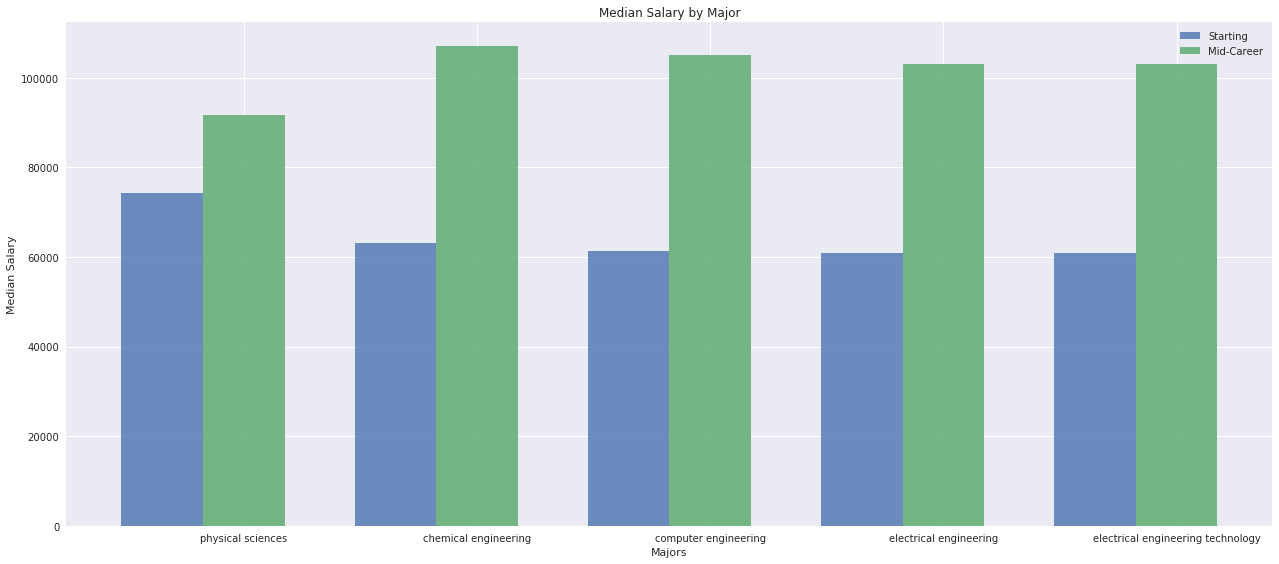

In [40]:
# data to plot #MICA CHANGE THIS TO SOMETHING ELSE
n_groups = 5
startingMed = top5Starting["Starting Median Salary"]
midMed = top5Starting["Mid-Career Median Salary"]

# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, startingMed, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Starting')

rects2 = plt.bar(index + bar_width, midMed, bar_width, 
                 alpha=opacity, color='g', label='Mid-Career')

plt.xlabel('Majors')
plt.ylabel('Median Salary')
plt.title('Median Salary by Major')
plt.xticks(index + bar_width, top5Starting["Major"])
plt.legend()

plt.tight_layout()
plt.show()

### Linear Regression

In [41]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('Starting Median Salary') 
    plt.ylabel('Mid-Career Median Salary') 
  
    # function to show plot 
    plt.show() 
  


In [42]:
def main(): 
    # observations 
    x = np.array(all_match['Starting Median Salary'])
    y = np.array(all_match['Mid-Career Median Salary']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 

Estimated coefficients:
b_0 = 611.7433827120112
b_1 = 1.6702670062674274


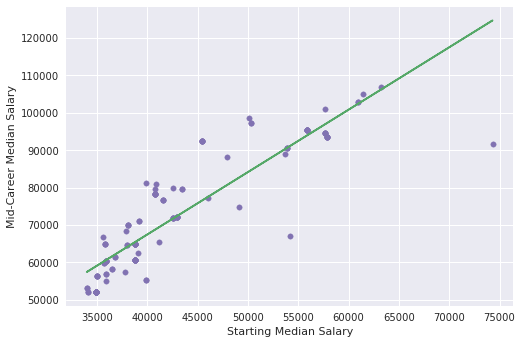

In [43]:
main()

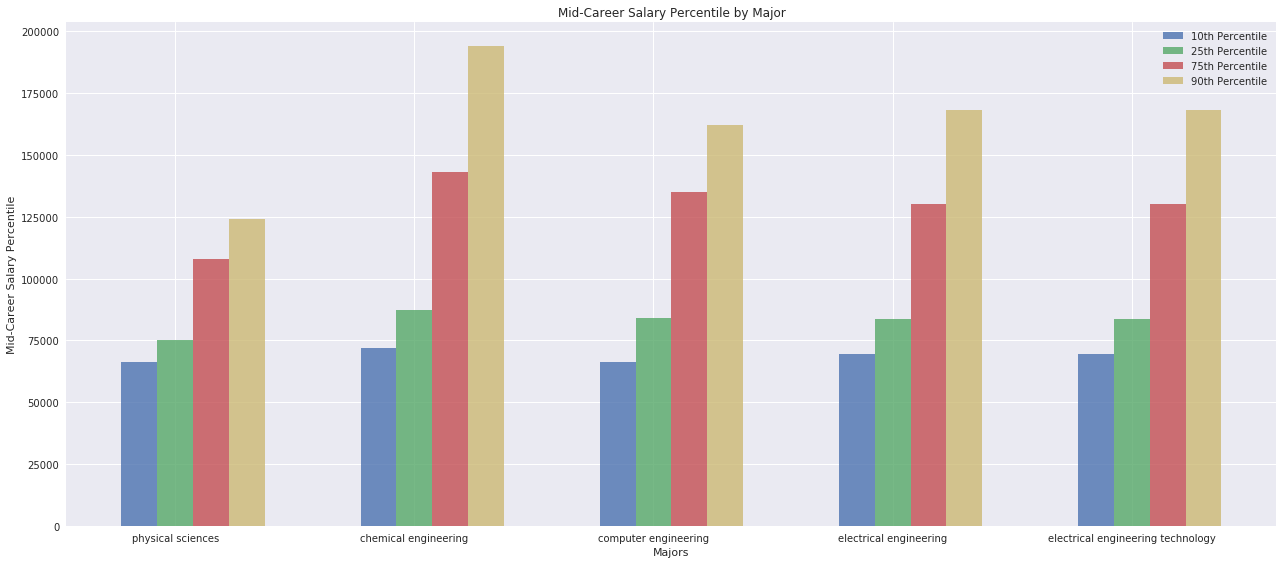

In [44]:
# data to plot
n_groups = 5
#Mid-Career 10th Percentile Salary	Mid-Career 25th Percentile Salary	Mid-Career 75th Percentile Salary	Mid-Career 90th Percentile Salary
mid10th = top5Starting["Mid-Career 10th Percentile Salary"]
mid25th = top5Starting["Mid-Career 25th Percentile Salary"]
mid75th = top5Starting["Mid-Career 75th Percentile Salary"]
mid90th = top5Starting["Mid-Career 90th Percentile Salary"]


# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, mid10th, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='10th Percentile')

rects2 = plt.bar(index + bar_width, mid25th, bar_width, 
                 alpha=opacity, color='g', label='25th Percentile')

rects3 = plt.bar(index + 2*bar_width, mid75th, bar_width, 
                 alpha=opacity, color='r', label='75th Percentile')

rects4 = plt.bar(index + 3*bar_width, mid90th, bar_width, 
                 alpha=opacity, color='y', label='90th Percentile')

plt.xlabel('Majors')
plt.ylabel('Mid-Career Salary Percentile')
plt.title('Mid-Career Salary Percentile by Major')
plt.xticks(index + bar_width, top5Starting["Major"])
plt.legend()

plt.tight_layout()
plt.show()

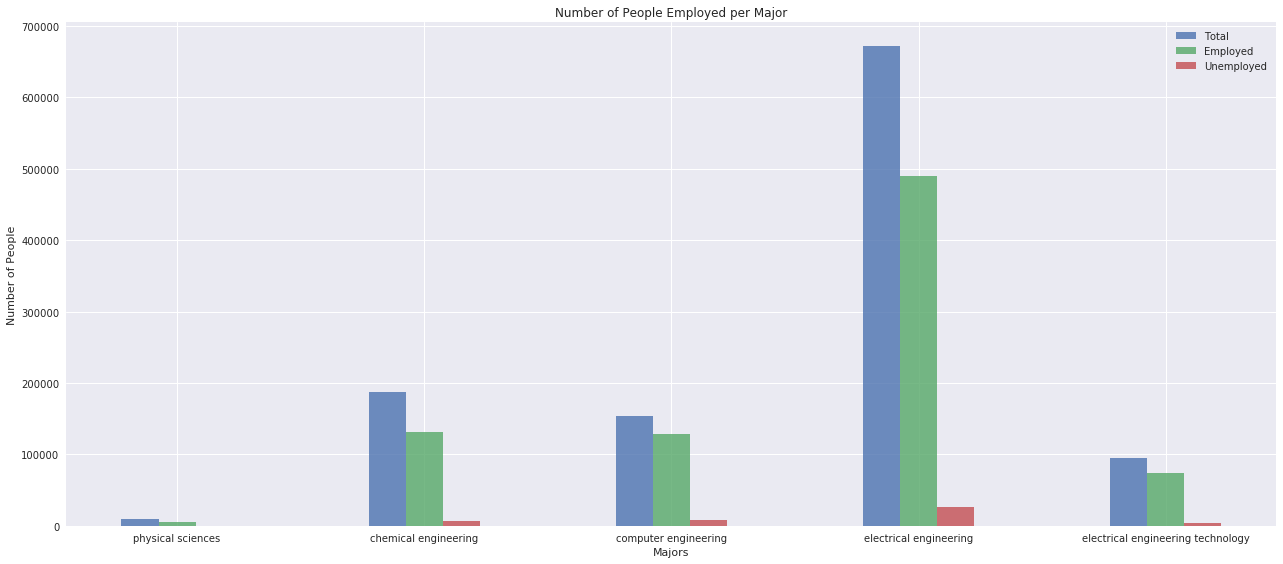

In [45]:
# data to plot
n_groups = 5
#Mid-Career 10th Percentile Salary	Mid-Career 25th Percentile Salary	Mid-Career 75th Percentile Salary	Mid-Career 90th Percentile Salary
tot = top5Starting["Total"]
emp = top5Starting["Employed"]
unemp = top5Starting["Unemployed"]
#mid90th = top5Starting["Mid-Career 90th Percentile Salary"]


# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, tot, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Total')

rects2 = plt.bar(index + bar_width, emp, bar_width, 
                 alpha=opacity, color='g', label='Employed')

rects3 = plt.bar(index + 2*bar_width, unemp, bar_width, 
                 alpha=opacity, color='r', label='Unemployed')

#rects4 = plt.bar(index + 3*bar_width, mid90th, bar_width, 
#                 alpha=opacity, color='y', label='90th Percentile')
#
plt.xlabel('Majors')
plt.ylabel('Number of People')
plt.title('Number of People Employed per Major')
plt.xticks(index + bar_width, top5Starting["Major"])
plt.legend()

plt.tight_layout()
plt.show()

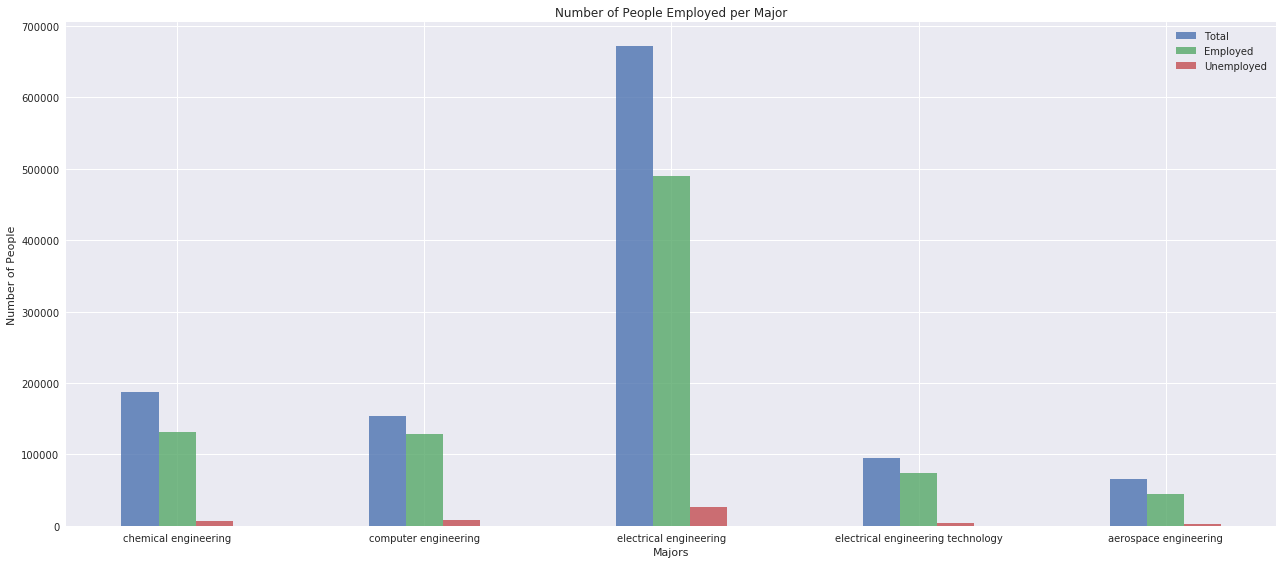

In [46]:
# data to plot
n_groups = 5
#Mid-Career 10th Percentile Salary	Mid-Career 25th Percentile Salary	Mid-Career 75th Percentile Salary	Mid-Career 90th Percentile Salary
tot = top5Mid["Total"]
emp = top5Mid["Employed"]
unemp = top5Mid["Unemployed"]
#mid90th = top5Starting["Mid-Career 90th Percentile Salary"]


# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, tot, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Total')

rects2 = plt.bar(index + bar_width, emp, bar_width, 
                 alpha=opacity, color='g', label='Employed')

rects3 = plt.bar(index + 2*bar_width, unemp, bar_width, 
                 alpha=opacity, color='r', label='Unemployed')

#rects4 = plt.bar(index + 3*bar_width, mid90th, bar_width, 
#                 alpha=opacity, color='y', label='90th Percentile')
#
plt.xlabel('Majors')
plt.ylabel('Number of People')
plt.title('Number of People Employed per Major')
plt.xticks(index + bar_width, top5Mid["Major"])
plt.legend()

plt.tight_layout()
plt.show()

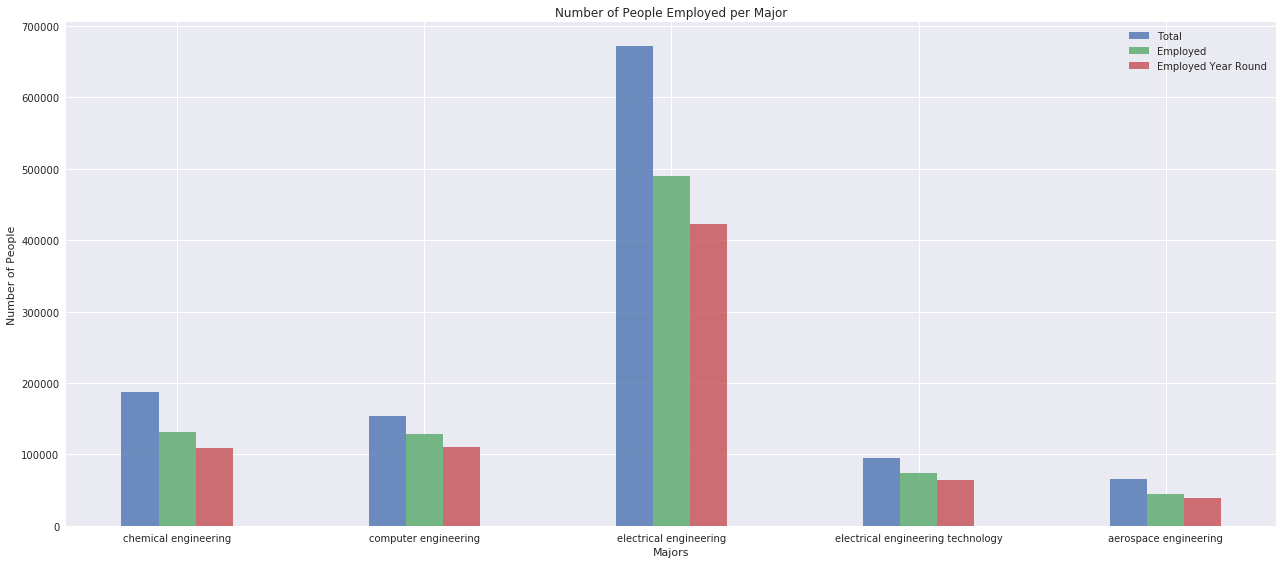

In [47]:
# data to plot
n_groups = 5
#Mid-Career 10th Percentile Salary	Mid-Career 25th Percentile Salary	Mid-Career 75th Percentile Salary	Mid-Career 90th Percentile Salary
tot = top5Mid["Total"]
emp = top5Mid["Employed"]
unemp = top5Mid["Employed_full_time_year_round"]
#mid90th = top5Starting["Mid-Career 90th Percentile Salary"]


# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, tot, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Total')

rects2 = plt.bar(index + bar_width, emp, bar_width, 
                 alpha=opacity, color='g', label='Employed')

rects3 = plt.bar(index + 2*bar_width, unemp, bar_width, 
                 alpha=opacity, color='r', label='Employed Year Round')

#rects4 = plt.bar(index + 3*bar_width, mid90th, bar_width, 
#                 alpha=opacity, color='y', label='90th Percentile')
#
plt.xlabel('Majors')
plt.ylabel('Number of People')
plt.title('Number of People Employed per Major')
plt.xticks(index + bar_width, top5Mid["Major"])
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
bottom5Start = all_match.nsmallest(5,'Starting Median Salary')
bottom5Start.head()

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
98,french german latin and other common foreign l...,spanish,236342.0,153654.0,99459.0,9598.0,0.06,48000.0,33500.0,69000.0,spanish,34000.0,53100.0,56.2,31000.0,40000.0,76800.0,96400.0
99,other foreign languages,spanish,57793.0,34696.0,23046.0,2707.0,0.07,45000.0,30000.0,75000.0,spanish,34000.0,53100.0,56.2,31000.0,40000.0,76800.0,96400.0
113,philosophy and religious studies,religion,205763.0,138734.0,95429.0,11252.0,0.08,45000.0,30000.0,70000.0,religion,34100.0,52000.0,52.5,29700.0,36500.0,70900.0,96400.0
114,theology and religious vocations,religion,232865.0,164827.0,121606.0,7317.0,0.04,40000.0,27000.0,56000.0,religion,34100.0,52000.0,52.5,29700.0,36500.0,70900.0,96400.0
55,general education,education,1438867.0,843693.0,591863.0,38742.0,0.04,43000.0,32000.0,59000.0,education,34900.0,52000.0,49.0,29300.0,37900.0,73400.0,102000.0


In [49]:
bottom5Rates = all_match.nlargest(5,'Unemployment_rate')
bottom5Rates.head()

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
120,miscellaneous fine arts,art history,8511.0,6431.0,3802.0,1190.0,0.16,45000.0,30000.0,60000.0,art history,35800.0,64900.0,81.3,28800.0,42200.0,87400.0,125000.0
69,school student counseling,psychology,2396.0,1492.0,1093.0,169.0,0.10,41000.0,33200.0,50000.0,psychology,35900.0,60400.0,68.2,31600.0,42100.0,87500.0,127000.0
70,clinical psychology,psychology,7638.0,5128.0,3297.0,587.0,0.10,45000.0,26100.0,62000.0,psychology,35900.0,60400.0,68.2,31600.0,42100.0,87500.0,127000.0
1,architecture,architecture,294692.0,216770.0,163020.0,20394.0,0.09,63000.0,40400.0,93500.0,architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
46,communication technologies,communications,62141.0,49609.0,37261.0,4609.0,0.09,50000.0,34500.0,75000.0,communications,38100.0,70000.0,83.7,37500.0,49700.0,98800.0,143000.0


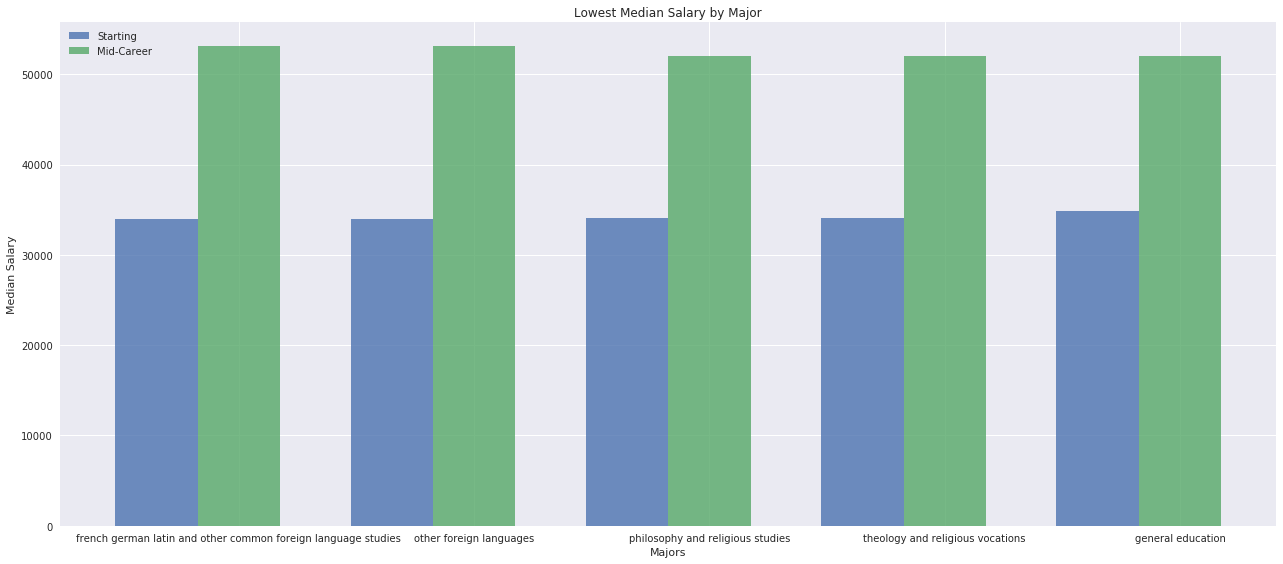

In [50]:
# data to plot #MICA CHANGE THIS TO SOMETHING ELSE
n_groups = 5
bottomStart = bottom5Start["Starting Median Salary"]
bottomMid = bottom5Start["Mid-Career Median Salary"]

# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, bottomStart, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Starting')

rects2 = plt.bar(index + bar_width, bottomMid, bar_width, 
                 alpha=opacity, color='g', label='Mid-Career')

plt.xlabel('Majors')
plt.ylabel('Median Salary')
plt.title('Lowest Median Salary by Major')
plt.xticks(index + bar_width, bottom5Start["Major"])
plt.legend()

plt.tight_layout()
plt.show()

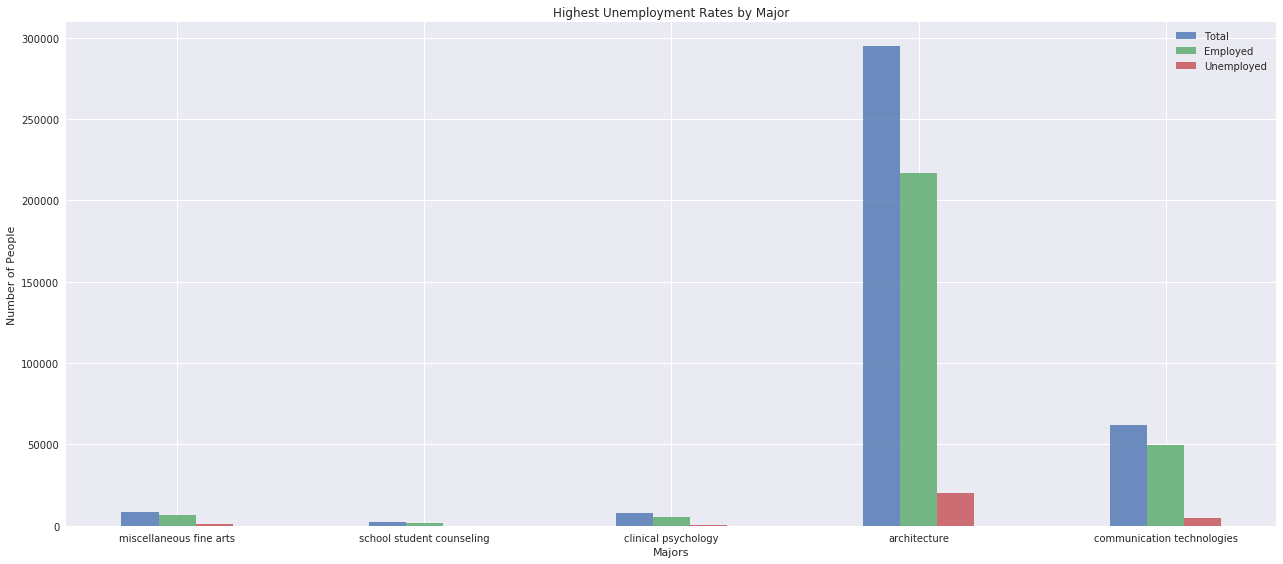

In [61]:
# data to plot #MICA CHANGE THIS TO SOMETHING ELSE
n_groups = 5
bottomTot = bottom5Rates["Total"]
bottomEmp = bottom5Rates["Employed"]
bottomUnemp = bottom5Rates["Unemployed"]

# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, bottomTot, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Total')

rects2 = plt.bar(index + bar_width, bottomEmp, bar_width, 
                 alpha=opacity, color='g', label='Employed')

rects3 = plt.bar(index + 2*bar_width, bottomUnemp, bar_width, 
                 alpha=opacity, color='r', label='Unemployed')

plt.xlabel('Majors')
plt.ylabel('Number of People')
plt.title('Highest Unemployment Rates by Major')
plt.xticks(index + bar_width, bottom5Rates["Major"])
plt.legend()

plt.tight_layout()
plt.show()

In [52]:
mostPeople = all_match.nlargest(5,'Total')
mostPeople.head()

,Major,major_match,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
127,business management and administration,business management,3123510.0,2354398.0,1939384.0,147261.0,0.06,58000.0,39500.0,86000.0,business management,43000.0,72100.0,67.7,38800.0,51500.0,102000.0,147000.0
126,general business,business management,2148712.0,1580978.0,1304646.0,85626.0,0.05,60000.0,40000.0,95000.0,business management,43000.0,72100.0,67.7,38800.0,51500.0,102000.0,147000.0
21,accounting,accounting,1779219.0,1335825.0,1095027.0,75379.0,0.05,65000.0,42500.0,100000.0,accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
20,nursing,nursing,1769892.0,1325711.0,947546.0,36503.0,0.03,62000.0,48000.0,80000.0,nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
14,psychology,psychology,1484075.0,1055854.0,736817.0,79066.0,0.07,45000.0,31000.0,68000.0,psychology,35900.0,60400.0,68.2,31600.0,42100.0,87500.0,127000.0


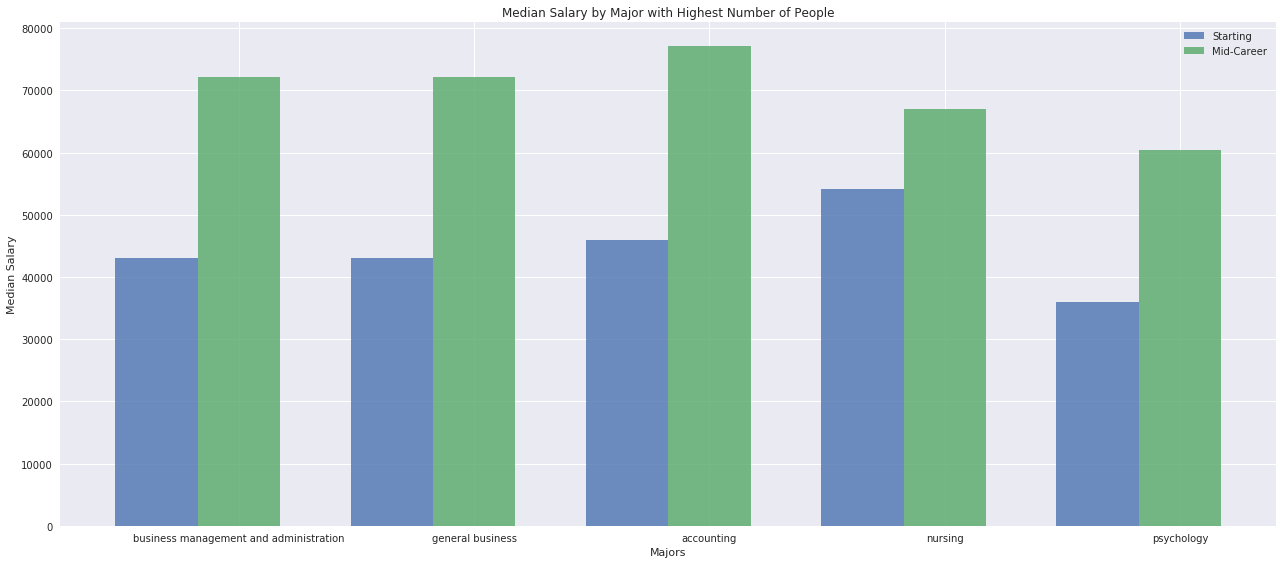

In [53]:
# data to plot #MICA CHANGE THIS TO SOMETHING ELSE
n_groups = 5
starting = mostPeople["Starting Median Salary"]
mid = mostPeople["Mid-Career Median Salary"]

# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, starting, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Starting')

rects2 = plt.bar(index + bar_width, mid, bar_width, 
                 alpha=opacity, color='g', label='Mid-Career')

plt.xlabel('Majors')
plt.ylabel('Median Salary')
plt.title('Median Salary by Major with Highest Number of People')
plt.xticks(index + bar_width, mostPeople["Major"])
plt.legend()

plt.tight_layout()
plt.show()

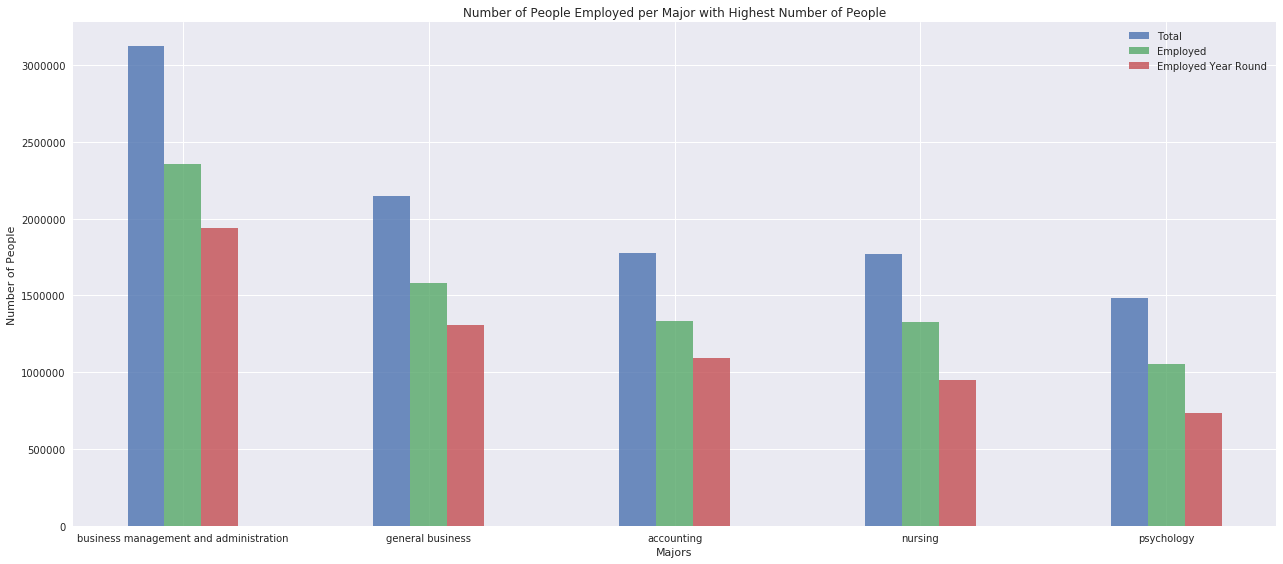

In [54]:
# data to plot
n_groups = 5
#Mid-Career 10th Percentile Salary	Mid-Career 25th Percentile Salary	Mid-Career 75th Percentile Salary	Mid-Career 90th Percentile Salary
tot = mostPeople["Total"]
emp = mostPeople["Employed"]
unemp = mostPeople["Employed_full_time_year_round"]
#mid90th = top5Starting["Mid-Career 90th Percentile Salary"]


# create plot
fig, ax = plt.subplots(figsize = (18,8))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, tot, bar_width, 
                 alpha=opacity, 
                 color='b', 
                 label='Total')

rects2 = plt.bar(index + bar_width, emp, bar_width, 
                 alpha=opacity, color='g', label='Employed')

rects3 = plt.bar(index + 2*bar_width, unemp, bar_width, 
                 alpha=opacity, color='r', label='Employed Year Round')

#rects4 = plt.bar(index + 3*bar_width, mid90th, bar_width, 
#                 alpha=opacity, color='y', label='90th Percentile')
#
plt.xlabel('Majors')
plt.ylabel('Number of People')
plt.title('Number of People Employed per Major with Highest Number of People')
plt.xticks(index + bar_width, mostPeople["Major"])
plt.legend()

plt.tight_layout()
plt.show()